In [1]:
!pip install librosa --use-feature=2020-resolver

  Using cached numba-0.56.3-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.2-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2


In [1]:
import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

audio_path = './Soundtest/trunc_2019-08-21-10-05-00-L5_7.wav'

In [2]:
ipd.Audio(audio_path)

1. waveform (파형)Permalink
y, sr = librosa.load(audio_path, sr=16000)

y: 파형의 amplitude 값

sr: sampling rate(초당 샘플 갯수)

In [3]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (240000,)
length: 15.0 secs


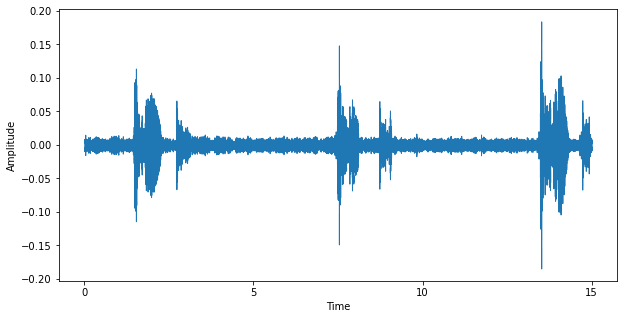

In [4]:
plt.figure(figsize = (10,5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

2. FFT (Fast Fourier Transform)Permalink
Fourier Transform: time-domain의 그래프를 frequency-domain으로 변환시켜주는 작업

y파형을 주파수 분석을 통해, 특정 시간에 주파수 성분이 어떻게 구성되어 있는지 확인 가능.
음성 데이터 분석을 할 때 주파수 분석 기법을 많이 사용함.

numpy에 함수가 제공됨.

Text(0.5, 1.0, 'Power spectrum')

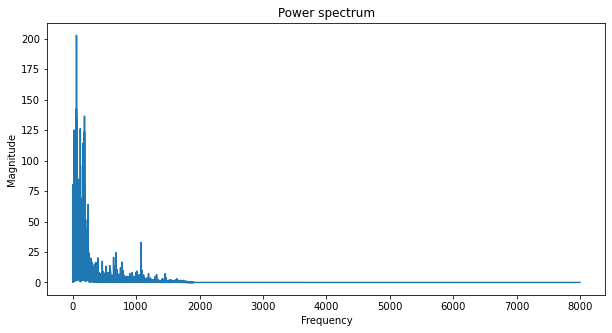

In [5]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

3. STFT (Short-Time Fourier Transform)Permalink
STFT(Short-Time Fourier Transform)은 시간 정보가 유실되는 것을 방지하기 위해, 사전에 정의한 시간의 간격(window 또는 frame) 단위로 쪼개어 푸리에 변환을 적용하는 기법
STFT는 librosa를 통해 적용할 수 있음.
이때, window의 크기(n_fft)와 window 간에 겹치는 사이즈(hop_length)를 설정함. 

일반적으로는 n_fft의 1/4 정도가 겹치도록 설정.

win_length는 FFT를 할 때 참조할 그래프의 길이

hop_length는 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터 즉, 칼라맵의 시간 주기라고 볼 수 있다.

n_fft는 win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다.

In [6]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[3.9029324e-01 1.4765912e+00 1.0965457e+00 ... 2.1312094e-01
  3.9848575e-01 2.7196553e-01]
 [9.3915164e-01 1.7491500e+00 6.4479196e-01 ... 5.2062744e-01
  3.6526176e-01 2.4977598e-01]
 [1.3489074e+00 1.9598798e+00 1.1792228e+00 ... 1.5088961e+00
  4.9972543e-01 3.2009429e-01]
 ...
 [3.2517249e-03 1.6230546e-03 2.1933641e-08 ... 6.1419492e-08
  1.0202363e-05 1.8464462e-04]
 [3.2517174e-03 1.6230626e-03 1.6044803e-08 ... 8.9846878e-08
  1.0148556e-05 1.8463979e-04]
 [3.2517279e-03 1.6231021e-03 2.9433936e-08 ... 5.4891917e-08
  1.0213224e-05 1.8466837e-04]]


Spectogram

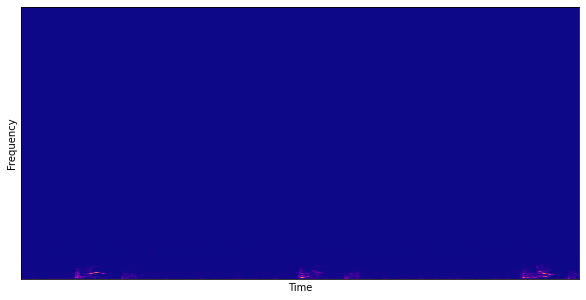

In [7]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Log-spectogramPermalink
spectrogram : 시간에 따라 변화하는 신호의 주파수 스펙트럼의 크기를 시각적으로 표현한 것

보통 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구한다. 
시각적인 이유뿐만 아니라, 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이함.

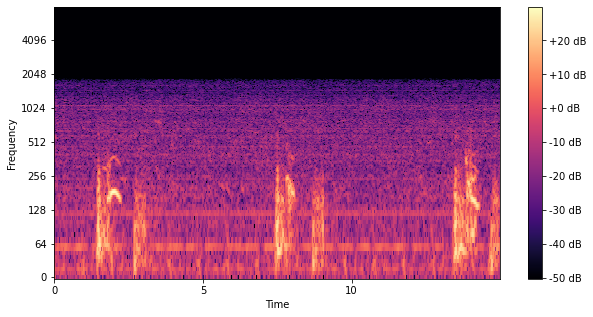

In [8]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")


4. MFCC (Mel Frequency Cepstral Coefficient)Permalink
MFCC: 오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값(Feature)

사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지는 고유한 특징을 추출한 값이다.

librosa.feature.mfcc(audio, sr, n_mfcc, n_fft, hop_length)

sr
default값은 22050Hz이다. 앞서 음성 데이터를 load 할 때 sr을 16000Hz으로 했기 때문에 꼭 sr=16000을 파라미터로 사용.
(사람의 목소리는 대부분 16000Hz 안에 포함된다고 한다)

n_mfcc
return 될 mfcc의 개수를 정해주는 파라미터이다. default값은 20.

n_fft
win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다.

(16000 * 0.015 = 400) 즉, n_fft는 sr에 frame_length인 0.015를 곱한 값이다.

hop_length
얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터, 10ms를 기본으로 하고 있어 16000Hz인 음성에서는 160에 해당한다.(16000 * 0.01 = 160) 즉, hop_length는 sr에 frame_stride인 0.01를 곱해서 구할 수 있다.

window_length가 0.025이고 frame_stride가 0.01이라고 하면 0.015초씩은 데이터를 겹치면서 읽는다고 생각하면 됩니다.

In [9]:
mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 469)
MFCC: 
 [[-4.7502106e+02 -4.9074271e+02 -5.0611386e+02 ... -4.9528894e+02
  -5.0126547e+02 -5.0408762e+02]
 [ 1.4240327e+02  1.8283815e+02  1.8931525e+02 ...  2.0366463e+02
   1.9811714e+02  1.9427815e+02]
 [ 7.2614985e+00  9.5147572e+00  2.2085495e+01 ...  3.6394554e+01
   3.5123497e+01  3.1417700e+01]
 ...
 [ 1.0542738e+00  4.3985367e+00  3.9423215e+00 ... -3.4516037e-01
  -2.2112119e+00 -8.9501828e-01]
 [-5.6272978e-01 -1.2317491e+00 -5.5483847e+00 ... -8.0417919e+00
  -7.6167841e+00 -7.2307277e+00]
 [ 1.7122319e+00 -3.8670850e-01 -3.4219847e+00 ... -3.6583831e+00
  -9.0119325e-02  1.8905665e+00]]


<ipython-input-9-27c226d10137>:1: FutureWarning: Pass y=[ 0.00712196  0.00805245  0.00840895 ... -0.00265223 -0.00187385
 -0.00098228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)


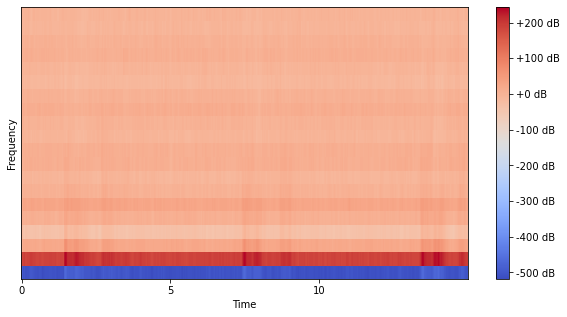

In [10]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()